# HW02: Tokenization

Remember that these homework work as a completion grade. **You can skip one section without losing credit.**

In [1]:
#Import the AG news dataset (same as hw01)
#Download them from here 
#!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv

import pandas as pd
import nltk
df = pd.read_csv('train.csv')

df.columns = ["label", "title", "lead"]
label_map = {1:"world", 2:"sport", 3:"business", 4:"sci/tech"}
def replace_label(x):
	return label_map[x]
df["label"] = df["label"].apply(replace_label) 
df["text"] = df["title"] + " " + df["lead"]
df.head()

,label,title,lead,text
0,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
1,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
2,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
3,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."
4,business,"Stocks End Up, But Near Year Lows (Reuters)",Reuters - Stocks ended slightly higher on Frid...,"Stocks End Up, But Near Year Lows (Reuters) Re..."


## Preprocess Text

In [2]:
import spacy
dfs = df.sample(50)
nlp = spacy.load('en_core_web_sm')

##TODO use spacy to split the documents in the sampled dataframe (dfs) in sentences and tokens
dfs["doc"] = dfs["text"].apply(nlp)


##TODO print the first sentence of the first document in your sample
print(list(dfs['doc'].iloc[0].sents)[0])

/home/felix/miniconda3/envs/nlp_lss/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Bush Environment Record an Issue in Nev. (AP) AP -


In [3]:
##TODO create a new column with tokens in lowercase (x.lower()), without punctuation tokens (x.is_punct) nor stopwords (x.is_stop)

# This casts to list of strings => cant use information about tokens and sentences anymore... 
#def tokenize(doc):
#    return [w.lemma_.lower() for w in doc if not w.is_stop and not w.is_punct and not w.is_digit]

def tokenize(doc):
    new_doc_string = ''
    for sent in doc.sents:
        for w in sent:
            if not w.is_stop and not w.is_punct and not w.is_digit:
                new_doc_string += w.lemma_.lower() + ' ' 
        new_doc_string += '.'
    return nlp(new_doc_string)

dfs["toks"] = dfs["doc"].apply(tokenize)

##TODO print the tokens (x.lemma_) and the tags (x.tag_ ) of the first sentence of the first document (doc.sents)
print([x.lemma_ for x in list(dfs["toks"].iloc[0].sents)[0]])
print([x.tag_ for x in list(dfs["toks"].iloc[0].sents)[0]])


['bush', 'environment', 'record', 'issue', 'nev', '.']
['NNP', 'NNP', 'NN', 'NN', 'NN', '.']


### Noun Chunks

In [4]:
##TODO print the first 20 noun chuncks in your sample corpus (doc.noun_chunks)
i=0
for chunk in dfs["doc"].iloc[0].noun_chunks:
    print ('{} - {}'.format(chunk, chunk.label_))
    if i > 20:
        break
    i += 1


Bush Environment Record - NP
an Issue - NP
Nev. (AP) AP - NP
environmentalists - NP
anger - NP
President Bush - NP
electoral votes - NP
John Kerry - NP
the biggest and perhaps only field - NP
dreams - NP
a nuclear waste dump site - NP
Nevada - NP


### Named Entities

Let's compute the ratio of named entities starting with a capital letter, e.g. if we have "University of Chicago" as a NE, "University" and "Chicago" are capitalized, "of" is not, thus the ratio is 2/3.

In [5]:
##TODO print the ratio of tokens being part of a named entity span starting with a capital letter (doc.ents)

def is_capitalized(w):
    return w.lemma_[0].isupper()


def is_capitalized__entities__ratio(doc):
    caps_list = list(map(is_capitalized, doc.ents))

    if len(caps_list) > 0: 
        caps_ratio = sum(caps_list) / float(len(caps_list))
    else:
        caps_ratio = 0

        
    print(doc.ents)
    print(caps_list)
    print(f"ratio: {caps_ratio}")

    return caps_ratio

print(list(dfs["doc"].apply(is_capitalized__entities__ratio)))


(Bush Environment Record, Nev., AP, AP, Bush, John Kerry, Nevada)
[True, True, True, True, True, True, True]
ratio: 1.0
(AMD, Aiming, Intel, Advanced Micro Devices, this week, the middle of next year)
[True, False, True, True, False, False]
ratio: 0.5
(U.S., Iraqi Holy City, AP, AP, U.S., Najaf, Shiite, Sunday, Baghdad)
[True, True, True, True, True, True, False, True, True]
ratio: 0.8888888888888888
(Microsoft, IE, Just days, 1.0, Microsoft, Explorer)
[True, True, False, False, True, True]
ratio: 0.6666666666666666
(Georgia, AP, AP, Luke Schenscher, 25.9 seconds, B.J. Elder, three, 3, the final nine minutes, 3, Georgia Tech, Illinois-Chicago, 60, Monday, night)
[True, True, True, True, False, True, False, False, False, False, True, True, False, True, False]
ratio: 0.5333333333333333
(nearly three years, Senate, Monday)
[False, True, True]
ratio: 0.6666666666666666
(OPENWORLD, SAN FRANCISCO, Dec. 8, /PRNewswire-FirstCall/, NASDAQ, ORCL, today)
[True, True, True, False, True, True, Fals

In [6]:
##TODO print the ratio of capitalized tokens not being part of a named entity span
# e.g. "The dog barks" = 1/3; 3 tokens, only "The" is capitalized

def is_not_entity(w):
    return w.ent_iob_ == 'O'

def is_capitalized__not_entitiy__ratio(doc):
    not_entities = list(filter(is_not_entity, doc))
    caps_list = list(map(is_capitalized, not_entities))
    
    if len(caps_list) > 0: 
        caps_ratio = sum(caps_list) / float(len(caps_list))
    else:
        caps_ratio = 0
        
    print(not_entities)
    print(caps_list)
    print(f"ratio: {caps_ratio}")

    return caps_ratio

print(list(dfs["doc"].apply(is_capitalized__not_entitiy__ratio)))

[an, Issue, in, (, ), -, For, environmentalists, hoping, to, turn, anger, at, President, into, electoral, votes, for, ,, the, biggest, and, perhaps, only, field, of, dreams, is, a, nuclear, waste, dump, site, in, .]
[False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
ratio: 0.02857142857142857
[to, demonstrate, dual, -, core, chips, to, deflate, archrival, ,, will, show, off, its, dual, -, core, chips, ,, which, will, start, to, trickle, out, toward, .]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
ratio: 0.0
[Battles, Shiites, in, (, ), -, tanks, and, troops, rolled, back, into, the, center, of, and, battled, with, militants, ,, reigniting, violence, in,

In [7]:
##TODO print the ratio of capitalized tokens not being a named entity and not being the first token in a sentence
# e.g. "The dog barks" = 0; 3 tokens, "The" is capitalized but the starting token of a sentence, no other tokens are capitalized.

def is_not_sent_start(w):
    return not w.sent_start

def is_capitalized__not_entitiy__not_sent_start__ratio(doc):
    not_sent_starters = list(filter(is_not_sent_start, doc))
    not_entities = list(filter(is_not_entity, not_sent_starters))
    caps_list = list(map(is_capitalized, not_entities))
    
    if len(caps_list) > 0: 
        caps_ratio = sum(caps_list) / float(len(caps_list))
    else:
        caps_ratio = 0

    print(not_entities)
    print(caps_list)
    print(f"ratio: {caps_ratio}")

    return caps_ratio


print(list(dfs["doc"].apply(is_capitalized__not_entitiy__not_sent_start__ratio)))

[]
[]
ratio: 0
[]
[]
ratio: 0
[]
[]
ratio: 0
[]
[]
ratio: 0
[]
[]
ratio: 0
[Corporate]
[False]
ratio: 0.0
[Industry]
[False]
ratio: 0.0
[]
[]
ratio: 0
[]
[]
ratio: 0
[]
[]
ratio: 0
[UAE]
[True]
ratio: 1.0
[]
[]
ratio: 0
[Oil]
[False]
ratio: 0.0
[]
[]
ratio: 0
[]
[]
ratio: 0
[Dell]
[True]
ratio: 1.0
[]
[]
ratio: 0
[]
[]
ratio: 0
[]
[]
ratio: 0
[Ferrero]
[False]
ratio: 0.0
[]
[]
ratio: 0
[]
[]
ratio: 0
[The]
[False]
ratio: 0.0
[]
[]
ratio: 0
[Consumer]
[False]
ratio: 0.0
[AstraZeneca]
[False]
ratio: 0.0
[]
[]
ratio: 0
[Brief]
[False]
ratio: 0.0
[New]
[False]
ratio: 0.0
[]
[]
ratio: 0
[Family]
[True]
ratio: 1.0
[]
[]
ratio: 0
[Toogle]
[False]
ratio: 0.0
[Church]
[False]
ratio: 0.0
[]
[]
ratio: 0
[A]
[False]
ratio: 0.0
[UPDATE]
[False]
ratio: 0.0
[]
[]
ratio: 0
[Golf]
[False]
ratio: 0.0
[]
[]
ratio: 0
[PACs]
[True]
ratio: 1.0
[]
[]
ratio: 0
[Doctors]
[False]
ratio: 0.0
[]
[]
ratio: 0
[]
[]
ratio: 0
[Is]
[False]
ratio: 0.0
[Red]
[True]
ratio: 1.0
[A]
[False]
ratio: 0.0
[]
[]
ratio: 0
[Nokia

In [23]:
print(f'In the sentence \"{dfs["doc"].iloc[5][:9]} [...]\", the first word \"{dfs["doc"].iloc[5][0]}\" is not considered as a sentence starter, although it should be:')
print(f'w.sent_start = {dfs["doc"].iloc[5][0].sent_start}')


In the sentence "Corporate Tax Measure Approved After nearly three years of [...]", the first word "Corporate" is not considered as a sentence starter, although it should be:
w.sent_start = False


Give an example of a capitalized token in the data which is neither a named entity nor at the start of a sentence. What could be the reason the token is capitalized (one sentence)?

## Term Frequencies

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=0.01, 
                        max_df=0.9,  
                        max_features=1000,
                        stop_words='english',
                        use_idf=True, # the new piece
                        ngram_range=(1,2))

from wordcloud import WordCloud
import matplotlib.pyplot as plt

##TODO using the whole sample, produce a world cloud with bigrams for each label using tfidf frequencies
X_tfidf = tfidf.fit_transform(df['text'])
pd.to_pickle(X_tfidf,'X_tfidf.pkl')

In [10]:
X_tfidf = pd.read_pickle('X_tfidf.pkl')

print(df['label'].value_counts())

vocab = tfidf.get_feature_names()
print(vocab[:10], vocab[-10:])

sci/tech    30000
sport       30000
world       30000
business    29999
Name: label, dtype: int64
['000', '10', '11', '12', '15', '20', '2004', '2005', '30', '39'] ['workers', 'world', 'world 39', 'www', 'www investor', 'year', 'years', 'yesterday', 'york', 'york reuters']


/home/felix/miniconda3/envs/nlp_lss/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


business


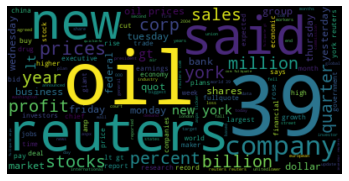

sci/tech


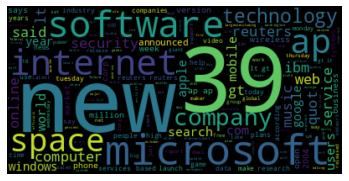

sport


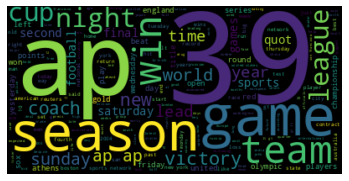

world


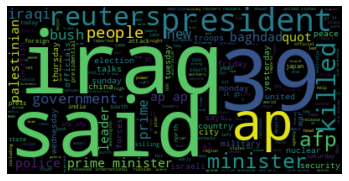

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

for label in df["label"].unique(): 
    slicer = df['label'] == label
    f = X_tfidf[slicer.values]
    total_freqs = list(np.array(f.sum(axis=0))[0])
    fdict = dict(zip(vocab,total_freqs))
    # generate word cloud of words with highest counts
    wordcloud = WordCloud().generate_from_frequencies(fdict) 
    print(label)
    plt.clf()
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.show()

## Hash Vectorizer

In [12]:
from sklearn.feature_extraction.text import HashingVectorizer

hv = HashingVectorizer(n_features=5000)

##TODO print the first 10 features produced by the hash vectorizer
hv.fit(df['text'])

from eli5.sklearn import InvertableHashingVectorizer
ivec = InvertableHashingVectorizer(hv)
inverted_hv = ivec.fit(df['text'])
print ([i for i in inverted_hv.get_feature_names()[:10]])


[[{'name': 'alternative', 'sign': -1.0}, {'name': 'swedish', 'sign': -1.0}, {'name': 'automated', 'sign': 1.0}, {'name': 'megapixel', 'sign': -1.0}, {'name': 'netware', 'sign': 1.0}, {'name': 'treasurer', 'sign': 1.0}, {'name': 'forbidden', 'sign': -1.0}, {'name': 'deteriorates', 'sign': -1.0}, {'name': 'sfx', 'sign': -1.0}, {'name': 'nathanael', 'sign': -1.0}, {'name': 'lefties', 'sign': -1.0}, {'name': 'pronounce', 'sign': 1.0}, {'name': 'tamecka', 'sign': -1.0}, {'name': 'doubleheder', 'sign': -1.0}, {'name': 'nicaraguans', 'sign': -1.0}, {'name': 'wronged', 'sign': -1.0}], [{'name': 'tradition', 'sign': -1.0}, {'name': 'victor', 'sign': 1.0}, {'name': 'explodes', 'sign': -1.0}, {'name': 'rite', 'sign': -1.0}, {'name': 'desperation', 'sign': -1.0}, {'name': 'hotelier', 'sign': -1.0}, {'name': 'schoolboy', 'sign': 1.0}, {'name': 'unjustly', 'sign': 1.0}, {'name': 'hous', 'sign': -1.0}, {'name': 'foundering', 'sign': 1.0}, {'name': 'erects', 'sign': 1.0}], [{'name': 'hostage', 'sign':

## Supervised Feature Selection

In [13]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

##TODO compute the number of words per document (excluding stopwords)
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS as stop_words
Y = df["text"].apply(lambda txt: len([w for w in txt.split() if w not in stop_words]))

##TODO get the most predictive features of the number of words per document using first f_class and then chi2

In [14]:
##TODO Most important words to predict document length according to chi2 
 
select = SelectKBest(chi2, k=10)
select.fit(X_tfidf, Y)
[vocab[i] for i in np.argsort(select.scores_)[:10]]

['market',
 'industry',
 'launch',
 'following',
 'olympic',
 'plans',
 'wins',
 'deal',
 'fall',
 'reports']

In [15]:
##TODO Most important words to predict document length according to f_classif  

select = SelectKBest(f_classif, k=10)
select.fit(X_tfidf, Y)
[vocab[i] for i in np.argsort(select.scores_)[:10]]

['launch',
 'olympic',
 'industry',
 'following',
 'market',
 'wins',
 'fall',
 'deal',
 'man',
 'reports']

Are the results different? What could be a reason for this? 

In [16]:
# They are very similar. 
# The order is not exactly the same but the top-10 words match except for 'launch' and 'plans'.

## Huggingface Tokenizers

In [17]:
# # we use distilbert tokenizer
from transformers import DistilBertTokenizerFast

# let's instantiate a tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

##TODO tokenize the sentences in the sampled dataframe (dfs) using the DisilBertTokenizer
dfs["bert_toks"] = dfs["text"].apply(tokenizer.tokenize)
dfs["bert_toks"].head(10)


25188     [bush, environment, record, an, issue, in, ne,...
15355     [am, ##d, to, demonstrate, dual, -, core, chip...
657       [u, ., s, ., battles, shi, ##ites, in, iraqi, ...
88116     [microsoft, says, fire, ##fo, ##x, not, a, thr...
99502     [georgia, tech, escapes, illinois, -, chicago,...
57695     [corporate, tax, measure, approved, after, nea...
111517    [industry, leaders, partner, with, oracle, to,...
15882     [uk, no, longer, top, asylum, nation, the, uk,...
43469     [seoul, dismiss, ##es, north, #, 39, ;, s, nu,...
36456     [chinese, economy, sets, for, soft, landing, i...
Name: bert_toks, dtype: object

In [18]:
##TODO what is the type/token ratio from this tokenizer (number_of_unqiue_token_types/number_of_tokens)?

number_of_unqiue_token_types = len(set([tok for doc in dfs["bert_toks"] for tok in doc]))
number_of_tokens = dfs["bert_toks"].apply(len).sum()
number_of_unqiue_token_types / number_of_tokens


0.43390357698289267

In [19]:
##TODO what is the amount of subword tokens returned by the huggingface tokenizer? hint: each subword token starts with "#"
def count_subwords(toks):
    counter = 0
    for tok in toks:
        counter += tok.count("##")
    return counter

dfs["bert_toks"].apply(count_subwords).sum()

184